# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
#app_train = app_train['CNT_CHILDREN_GROUP'] = pd.Series(data=np.NaN)
sub_conA = app_train[app_train['CNT_CHILDREN']==0]
sub_conB = app_train[app_train['CNT_CHILDREN']>0][app_train[app_train['CNT_CHILDREN']>0]['CNT_CHILDREN']<3]
sub_conC = app_train[app_train['CNT_CHILDREN']>2][app_train[app_train['CNT_CHILDREN']>2]['CNT_CHILDREN']<6]
sub_conD = app_train[app_train['CNT_CHILDREN']>5]


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [5]:
#1
"""
請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP

0 個小孩
有 1 - 2 個小孩
有 3 - 5 個小孩
有超過 5 個小孩
"""
cut_rule = [0,1,3,6,app_train['CNT_CHILDREN'].max()+1]
labels = ['A','B','C','D']

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True, labels=labels)
app_train['CNT_CHILDREN_GROUP'].value_counts()

A    276490
B     30466
C       534
D        21
Name: CNT_CHILDREN_GROUP, dtype: int64

In [39]:
#2-1
"""
請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
"""
grp = 'CNT_CHILDREN_GROUP'

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP
A    168361.253573
B    172747.592085
C    170224.382022
D    151714.285714
Name: AMT_INCOME_TOTAL, dtype: float64

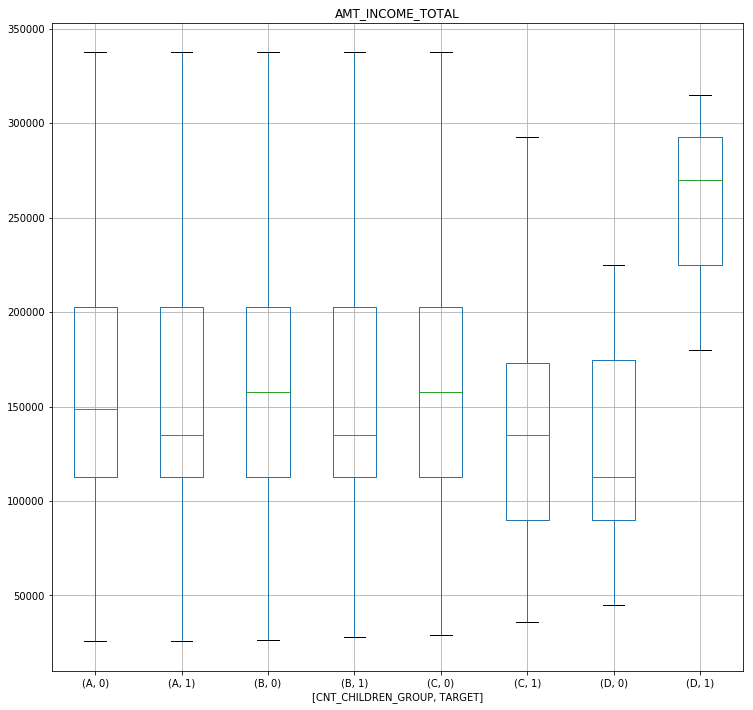

In [40]:
#2-2
"""
請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
"""
plt_column =  ['AMT_INCOME_TOTAL']
plt_by = ['CNT_CHILDREN_GROUP','TARGET']

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [8]:
#3
"""
請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 Z 轉換 後的分數
"""
grouped_df = app_train.groupby(['CNT_CHILDREN_GROUP','TARGET'])['AMT_INCOME_TOTAL']
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x-x.mean())/x.std())

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.045954
1,270000.0,0.962147
2,67500.0,-0.958437
3,135000.0,-0.318243
4,121500.0,-0.446282


In [13]:
grouped_df = app_train.groupby(['CNT_CHILDREN_GROUP','TARGET'])
#grouped_df = app_train.groupby(['CNT_CHILDREN_GROUP','TARGET'])['AMT_INCOME_TOTAL']
#app_train.iloc[grouped_df.groups[('A',0)]]['AMT_INCOME_TOTAL']
grouped_df.mean()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  \
CNT_CHILDREN_GROUP TARGET                                                  
A                  0       278226.060092      0.218786     168554.452269   
                   1       277399.988623      0.247201     166133.317001   
B                  0       278529.525509      2.120936     173824.963059   
                   1       278225.318469      2.133036     161627.570234   
C                  0       271188.165236      4.229614     173158.841202   
                   1       264805.294118      4.279412     150114.705882   
D                  0       285600.388889     10.500000     134500.000000   
                   1       229517.666667      9.666667     255000.000000   

                              AMT_CREDIT   AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN_GROUP TARGET                                                 
A                  0       601973.326787  27089.822204    542351.957065   
                   1       556410.877510  26349.843720    488163.422156   
B                  0       608550.858470  27818.546031    546105.436387   
                   1       570630.715719  27574.130435    497168.109706   
C                  0       624895.986052  28543.519313    557340.517241   
                   1       485546.625000  25864.808824    421774.941176   
D                  0       459056.000000  23975.250000    408500.000000   
                   1       724777.500000  30636.000000    610500.000000   

                           REGION_POPULATION_RELATIVE    DAYS_BIRTH  \
CNT_CHILDREN_GROUP TARGET                                             
A                  0                         0.021117 -16441.186089   
                   1                         0.019200 -15119.881612   
B                  0                         0.020153 -13395.911863   
                   1                         0.018611 -12986.135266   
C                  0                         0.020321 -14211.199571   
                   1                         0.017496 -13783.294118   
D                  0                         0.020728 -14500.500000   
                   1                         0.010831 -14318.333333   

                           DAYS_EMPLOYED  DAYS_REGISTRATION  ...  \
CNT_CHILDREN_GROUP TARGET                                    ...   
A                  0        72594.746831       -5189.155640  ...   
                   1        47154.540135       -4626.717491  ...   
B                  0         3438.763960       -3598.043026  ...   
                   1         4264.262728       -3381.141583  ...   
C                  0        11737.618026       -3469.300429  ...   
                   1         8945.867647       -3038.058824  ...   
D                  0        18650.666667       -4459.944444  ...   
                   1        -2083.666667       -2806.666667  ...   

                           FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
CNT_CHILDREN_GROUP TARGET                                       
A                  0               0.000597          0.000519   
                   1               0.000453          0.000589   
B                  0               0.000648          0.000396   
                   1               0.000743          0.000000   
C                  0               0.002146          0.000000   
                   1               0.000000          0.000000   
D                  0               0.000000          0.000000   
                   1               0.000000          0.000000   

                           FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
CNT_CHILDREN_GROUP TARGET                                                 
A                  0               0.000338                    0.006455   
                   1               0.000635                    0.006916   
B                  0               0.000108                    0.005695   
                   1               0.000000                    0.004872   
C                  0     